이번 글에서는 초압축 코딩(Superdense Coding, SDC) 프로토콜을 다룹니다. 먼저 Qiskit 시뮬레이터를 사용해서 양자 회로를 테스트한 다음 실제 양자 컴퓨터에서 테스트합니다.

## 목차

1. [초압축 코딩과 양자 전송](#difference)
2. [과정](#process)<br> 2.1 [1 단계](#step1)<br> 2.2 [2 단계](#step2)<br> 2.3 [3 단계](#step3)
3. [초압축 코딩 프로토콜 시뮬레이션](#simulating)<br> 3.1 [3.1 측정 시각화](#visualising)
4. [실제 양자 컴퓨터에서 초압축 코팅](#real_qc)

## 1. 초압축 코딩과 양자 전송 간 차이<a id="difference"></a>

양자 전송과 초압축 코딩은 밀접하게 관련 있으므로 혼동을 피하기 위해 차이를 명확히 해야 합니다.

양자 전송은 큐비트의 상태($|\psi\rangle$)를 한 위치에서 다른 위치로 전송할 수 있는 프로세스로 두 비트의 고전 통신과 벨 쌍을 활용합니다. 즉, 공유 얽힘의 도움으로 한 위치에 있는 큐비트의 양자 상태를 파괴하고 먼 위치의 큐비트에 그 양자 상태를 다시 생성하는 프로토콜이라고 할 수 있습니다. 초압축 코딩은 누군가가 단 하나의 큐비트 통신을 이용하여 다른 이에게 두 개의 고전 비트를 보낼 수 있도록 하는 절차입니다.

양자 전송 | 초압축 코딩
:-: | :-:
2 개의 고전 비트를 사용하여 1 개의 큐비트 전송 | 1 개의 큐비트를 사용하여 2 개의 고전 비트를 전송

양자 전송 프로토콜은 앨리스와 밥이 단지 "장치를 교환"한다는 점에서 초압축 코딩 프로토콜을 뒤집은 버전으로 생각할 수 있습니다.

This notebook demonstrates the Superdense Coding (SDC) protocol. We first use Qiskit's simulator to test our quantum circuit, and then try it out on a real quantum computer.

## Contents

1. [Superdense Coding and Quantum Teleportation](#difference)
2. [The Process](#process)    
    2.1 [Step 1](#step1)    
    2.2 [Step 2](#step2)    
    2.3 [Step 3](#step3)
3. [Simulating the Superdense Coding Protocol](#simulating)    
    3.1 [3.1 Visualizing Our Measurements](#visualising)    
4. [Superdense Coding on a Real Quantum Computer](#real_qc)


## 1. The Difference between Superdense Coding and Quantum Teleportation <a id='difference'></a>

Quantum teleportation and superdense coding are closely related, to avoid confusion we need to clarify the difference.

Quantum teleportation is a process by which the state of qubit ($|\psi\rangle$) can be transmitted from one location to another, using two bits of classical communication and a Bell pair. In other words, we can say it is a protocol that destroys the quantum state of a qubit in one location and recreates it on a qubit at a distant location, with the help of shared entanglement. Superdense coding is a procedure that allows someone to send two classical bits to another party using just a single qubit of communication.

| Teleportation                                     | Superdense Coding                                    |
|:-------------------------------------------------:|:----------------------------------------------------:|
| Transmit one<br>qubit using two<br>classical bits | Transmit two<br>classical bits<br>using one<br>qubit |


The teleportation protocol can be thought of as a flipped version of the superdense coding protocol, in the sense that Alice and Bob merely “swap their equipment.”

## 2. 과정 <a id="process"></a>

![image1](images/superdense.jpg)

### 2.1 1 단계 <a id="step1"></a>

프로세스는 찰리라 하는 제 3자 부터 시작합니다. 찰리는 얽힌 상태에 있는 두 개의 큐비트를 준비합니다. 찰리는 처음에 기본 상태 $|0\rangle$에 있는 2 큐비트에서 시작합니다. 하다마드 게이트 ($H$)를 첫 번째 큐비트에 적용하여 중첩을 생성합니다. 그런 다음 첫 번째 큐비트를 제어로 사용하고 두 번째 큐비트를 타겟으로 하여 CNOT 게이트 ($CX$)를 적용합니다. 이것이 앞서 언급한 얽힌 상태(벨 쌍)입니다.

#### 출력 상태

다음 상태에서 시작합니다.

$$|00\rangle = |0\rangle_A\otimes |0\rangle_B$$

여기서 앨리스에게 보내는 큐비트는 $A$라 하고 밥에게 보내는 큐비트는 $B$라고 합니다. 찰리는 먼저 중첩을 만드는 첫 번쨰 큐비트에 하다마드 게이트를 적용하고 다음 상태를 얻습니다.

$$|+0\rangle  =  \tfrac{1}{\sqrt{2}}(|00\rangle + |10\rangle)$$

그런 다음 찰리는 CNOT 게이트를 적용합니다. CNOT 게이트는 두 큐비트를 얽히게 합니다. 즉, 제어가 $|1\rangle$인 경우 타겟을 뒤집습니다. 제어 큐비트는 가장 왼쪽 큐비트입니다.

$$\text{CNOT} \tfrac{1}{\sqrt{2}}(|00\rangle + |10\rangle) = \tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$$

### 2.2 2 단계 <a id="step2"></a>

찰리는 첫 번째 큐비트를 앨리스에게 보내고 두 번째 큐비트를 밥에게 보냅니다. 프로토콜의 목표는 앨리스가 큐비트를 사용해서 밥에게 2 비트 정보를 보내는 것입니다. 하지만 전송전에 보내려는 2 비트 정보에 따라 양자 게이트 집합을 큐비트에 적용해야 합니다.

#### 초압축 코딩을 위한 부호화 규칙 (앨리스 프로토콜):

<table>
    <tr>
        <th>의도한 메시지</th>
        <th>적용한 게이트</th>
        <th>결과 상태 ($\cdot\tfrac{1}{\sqrt{2}}$)</th>
    </tr>
    <tr>
        <td>00</td>
        <td>$I$</td>
        <td>$|00\rangle + |11\rangle$</td>
    </tr>
    <tr>
        <td>01</td>
        <td>$X$</td>
        <td>$|10\rangle + |01\rangle$</td>
    </tr>
    <tr>
        <td>10</td>
        <td>$Z$</td>
        <td>$|00\rangle - |11\rangle$</td>
    </tr>
    <tr>
        <td>11</td>
        <td>$ZX$</td>
        <td>$-|10\rangle + |01\rangle$</td>
    </tr>
</table>

따라서 `00`을 보내려는 경우 큐비트(항등 ($I$) 게이트 적용)에 아무 것도 하지 않습니다. `01`를 보내려는 경우 $X$ 게이트를 적용합니다. 보내려는 비트에 따라 적절한 게이트를 적용한 다음 프로세스의 마지막 단계에서 밥에게 큐비트를 보냅니다.

### 2.3 Step 3 <a id="step3"></a>

밥은 엘리스의 큐비트 (가장 왼쪽 큐비트)를 수신하고 그의 큐비트를 사용하여 앨리스의 메시지를 복호화 합니다. 메시지를 복호화 할때 상태에 대한 정보가 필요 없습니다. 단순히 복원 작업을 사용합니다.

밥은 가장 왼쪽 큐비트를 제어로 사용하고 가장 오른쪽을 타겟으로 하여 CNOT 게이트로 적용합니다. 그런 다음 하다마드 게이트를 적용하고 마지막으로 두 큐비트에서 측정을 수행하여 앨리스의 메시지를 얻습니다.

<table>
    <tr>
        <th>밥이 수신한 상태($\cdot\tfrac{1}{\sqrt{2}}$)</th>
        <th>CNOT 게이터 적용 후($\cdot\tfrac{1}{\sqrt{2}}$)</th>
        <th>하다마드 게이트 적용 후</th>
    </tr>
    <tr>
        <td>$|00\rangle + |11\rangle$</td>
        <td>$|00\rangle + |10\rangle$</td>
        <td>$|00\rangle$</td>
    </tr>
    <tr>
        <td>$|10\rangle + |01\rangle$</td>
        <td>$|11\rangle + |01\rangle$</td>
        <td>$|01\rangle$</td>
    </tr>
    <tr>
        <td>$|00\rangle - |11\rangle$</td>
        <td>$|00\rangle - |10\rangle$</td>
        <td>$|10\rangle$</td>
    </tr>
    <tr>
        <td>$-|10\rangle + |01\rangle$</td>
        <td>$-|11\rangle + |01\rangle$</td>
        <td>$|11\rangle$</td>
    </tr>
</table>

## 3. 초압축 코팅 프로토콜 시뮬레이션<a id="simulating"></a>

In [1]:
# Importing everything
from qiskit import QuantumCircuit
from qiskit import IBMQ, Aer, transpile
from qiskit.visualization import plot_histogram

얽힌 쌍을 만들기 위해 하다마드 게이트 다음에 CNOT 게이트를 적용해야 합니다. `QuantumCircuit`를 사용하고 인덱스 `a` 및 `b`에 대해 얽힌 큐비트를 만드는 함수를 만들어 보겠습니다.

In [2]:
def create_bell_pair():
    """
    반환:
        QuantumCircuit: 벨 쌍을 만드는 회로 
    """
    qc = QuantumCircuit(2)
    qc.h(1)
    qc.cx(1, 0)
    return qc

다음으로 메시지를 부호화해야 합니다. 네 가지 메시지 `00`, `10`, `01`, `11` 를 보낼 수 있습니다. 이 메시지를 입력 받아 적절한 게이트를 생성하는 함수를 만들어 봅시다.

In [3]:
def encode_message(qc, qubit, msg):
    """초압축 코딩 프로토콜을 사용하여 qc에서 2비트 메시지를 부호화합니다.
    인수:
        qc (QuantumCircuit): 메시지를 부호화하는 회로
        qubit (int): 게이트에 추가하는 큐비트
        msg (str): 보내는 2비트 메시지
    반환:
        QuantumCircuit: 복호화 시 메시지를 생성하는  회로 
    오류 발생:
        msg 길이가 잘못되었거나 유효하지 않은 문자가 포함된 경우 ValueError
    """
    if len(msg) != 2 or not set(msg).issubset({"0","1"}):
        raise ValueError(f"message '{msg}' is invalid")
    if msg[1] == "1":
        qc.x(qubit)
    if msg[0] == "1":
        qc.z(qubit)
    return qc

마지막으로 메시지를 복호화해야 합니다. CNOT 게이트 다음에 하다마드 게이트를 적용할 수 있습니다. 이 작업을 수행하는 함수를 만들어 봅시다.

In [4]:
def decode_message(qc):
    qc.cx(1, 0)
    qc.h(1)
    return qc

마지막으로 이를 함께 모아 프로토콜을 완성할 수 있습니다.

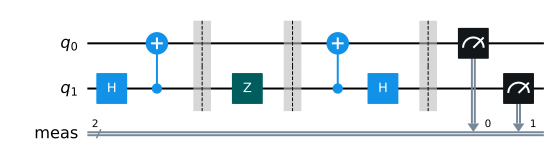

In [5]:
# 찰리는 앨리스와 밥 간의 얽힘 쌍을 생성합니다. 
qc = create_bell_pair()

# 배리어를 추가하여 게이트를 시각적으로 분리합니다.
qc.barrier()

# 이 시점에서 큐비트 0는 앨리스로, 큐비트 1은 밥에게로 갑니다. 

# 다음으로 앨리스는 메시지를 큐비트 1에 부호화 합니다.
# 메시지 '10'를 보내려 한다면 이 값을 변경 해보고 
# 회로에 어떤 영향을 미치는지 확인할 수 있습니다.
message = '10'
qc = encode_message(qc, 1, message)
qc.barrier()
# 그런 다음 앨리스는 큐비트를 밥에게 보냅니다. 

# 밥은 큐비트 0을 수신한 다음 복원 프로토콜을 적용합니다. 
qc = decode_message(qc)

# 마지막으로 밥은 큐비트를 측정하여 앨리스의 메시지를 읽습니다.
qc.measure_all()

# 출력을 그립니다.
qc.draw()

### 3.1 측정 시각화 <a id="visualising"></a>

{'10': 1024}


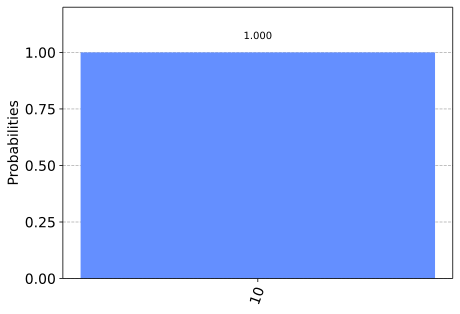

In [7]:
aer_sim = Aer.get_backend('aer_simulator')
result = aer_sim.run(qc).result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)

시뮬레이터는 완벽한 양자 컴퓨터를 시뮬레이션 합니다. 오류 없이 올바른 메시지를 측정할 확률이 100%임을 알 수 있습니다.

## 4. 실제 양자 컴퓨터에서 초압축 코딩 <a id="real_qc"></a>

실제 양자 컴퓨터에서 작동하는 것을 볼 수 있습니다. 우선 계정을 불러와 가장 사용량이 적은 양자 시스템을 얻습니다.

In [8]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
shots = 1024

# 로컬 계정 정보 IBMQ.load_account() 불러오기
# 가장 사용량이 적은 벡엔드 얻기
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)
# 회로 실행
t_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(t_qc)

least busy backend:  ibmq_quito


In [9]:
# 작업 모니터링
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


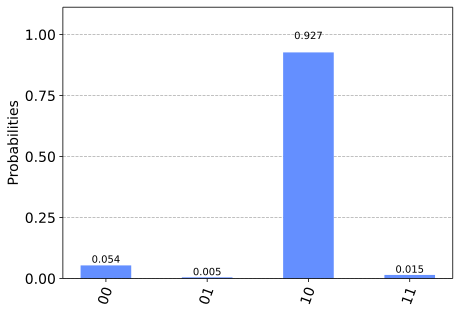

In [10]:
# 결과를 그립니다.
result = job.result()
plot_histogram(result.get_counts(qc))

실제 양자 컴퓨터에서 실행할 때 다른 세 가지 상태에서 몇 가지 결과가 있음을 알 수 있습니다. 이는 게이트와 양자 결깨짐의 오류 때문입니다. 나중 절에서 이러한 오류에 대해 알아볼 것입니다.

In [11]:
correct_results = result.get_counts(qc)[message]
accuracy = (correct_results/shots)*100
print(f"Accuracy = {accuracy:.2f}%")

Accuracy = 92.68%


In [12]:
import qiskit.tools.jupyter
%qiskit_version_table

/usr/local/anaconda3/envs/terra-unstable/lib/python3.9/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')
